In [2]:
from google.colab import files
tmp = files.upload()

Saving BAJFINANCE.csv to BAJFINANCE.csv


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'BAJFINANCE.csv'
dataset = pd.read_csv(url)
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [3]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset, test_size=0.1, shuffle=False)

In [4]:
dataset_train.shape

(4711, 15)

In [5]:
training_set = dataset_train.iloc[:, 4:5].values

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
Y_train = []

for i in range(60, 4711):
  X_train.append(training_set_scaled[i-60:i, 0])
  Y_train.append(training_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [9]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
146/146 [==============================] - 35s 147ms/step - loss: 0.0037
Epoch 2/100
146/146 [==============================] - 21s 143ms/step - loss: 0.0021
Epoch 3/100
146/146 [==============================] - 22s 150ms/step - loss: 0.0015
Epoch 4/100
146/146 [==============================] - 21s 143ms/step - loss: 0.0018
Epoch 5/100
146/146 [==============================] - 23s 158ms/step - loss: 0.0013
Epoch 6/100
146/146 [==============================] - 22s 149ms/step - loss: 0.0017
Epoch 7/100
146/146 [==============================] - 22s 150ms/step - loss: 0.0014
Epoch 8/100
146/146 [==============================] - 21s 141ms/step - loss: 0.0011
Epoch 9/100
146/146 [==============================] - 22s 149ms/step - loss: 0.0012
Epoch 10/100
146/146 [==============================] - 21s 144ms/step - loss: 0.0011
Epoch 11/100
146/146 [==============================] - 21s 143ms/step - loss: 0.0011
Epoch 12/100
146/146 [==============================] - 22s 148

In [11]:
dataset_test.shape

(524, 15)

In [12]:
real_stock_price = dataset_test.iloc[:, 4:5].values

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 60+524):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

17/17 [==============================] - 2s 38ms/step


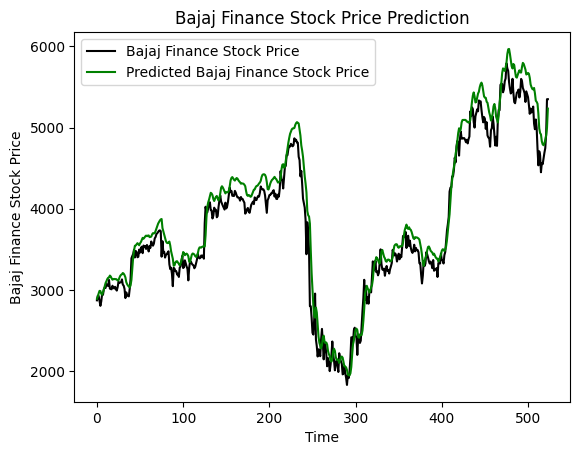

In [15]:
plt.plot(real_stock_price, color='black', label='Bajaj Finance Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted Bajaj Finance Stock Price')
plt.title('Bajaj Finance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bajaj Finance Stock Price')
plt.legend()
plt.show()